In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm

In [70]:
str = '2.3'
num = 4

In [71]:
data = pd.read_csv(f'experiments/experiment {str}.csv', skiprows=6)
data.head(5)

,[run number],avg-num-groups-per-agent,sd-num-groups-per-agent,group-strength-increase,gamma0,gamma1,num-agents,base-death-rate,bubble-size,max-ticks,...,opinion-extremity-increase,alpha2,max-age,multiple-group-membership?,offline-interaction-interval,birth-rate,interaction-radius,age-death-factor,[step],[opinion] of turtles
0,5,2,1,0.05,1.5,-0.5,350,0.0002,25,50000,...,0.01,0.3,100,True,50,0.140708,1,0.02,0,[0.5859809435787067 0.6624706353783609 0.30408...
1,2,2,1,0.05,1.5,-0.5,350,0.0002,25,50000,...,0.01,0.3,100,True,50,0.140708,1,0.02,0,[0.12208116160193438 0.8030672412839676 0.9387...
2,1,2,1,0.05,1.5,-0.5,350,0.0002,25,50000,...,0.01,0.3,100,True,50,0.140708,1,0.02,0,[0.33463824576994516 0.44531233852247554 0.326...
3,4,2,1,0.05,1.5,-0.5,350,0.0002,25,50000,...,0.01,0.3,100,True,50,0.140708,1,0.02,0,[0.8909357267387196 0.3314196250897644 0.29776...
4,3,2,1,0.05,1.5,-0.5,350,0.0002,25,50000,...,0.01,0.3,100,True,50,0.140708,1,0.02,0,[0.6222712827769799 0.10810688163455329 0.4829...


In [72]:
run_1_data = data[data['[run number]'] == num]
 
steps = []
opinions = []
for _, row in run_1_data.iterrows():
    step = row['[step]']
    current_opinions = list(map(float, row['[opinion] of turtles'].strip('[]').split()))
    steps.extend([step] * len(current_opinions))
    opinions.extend(current_opinions)

In [73]:
colours = [(1, 1, 1, 0), (0.75, 0.75, 0.75, 1), (0, 0, 0, 1)]  # Adding alpha transparency to white
cmap_name = 'custom_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colours, N=100)

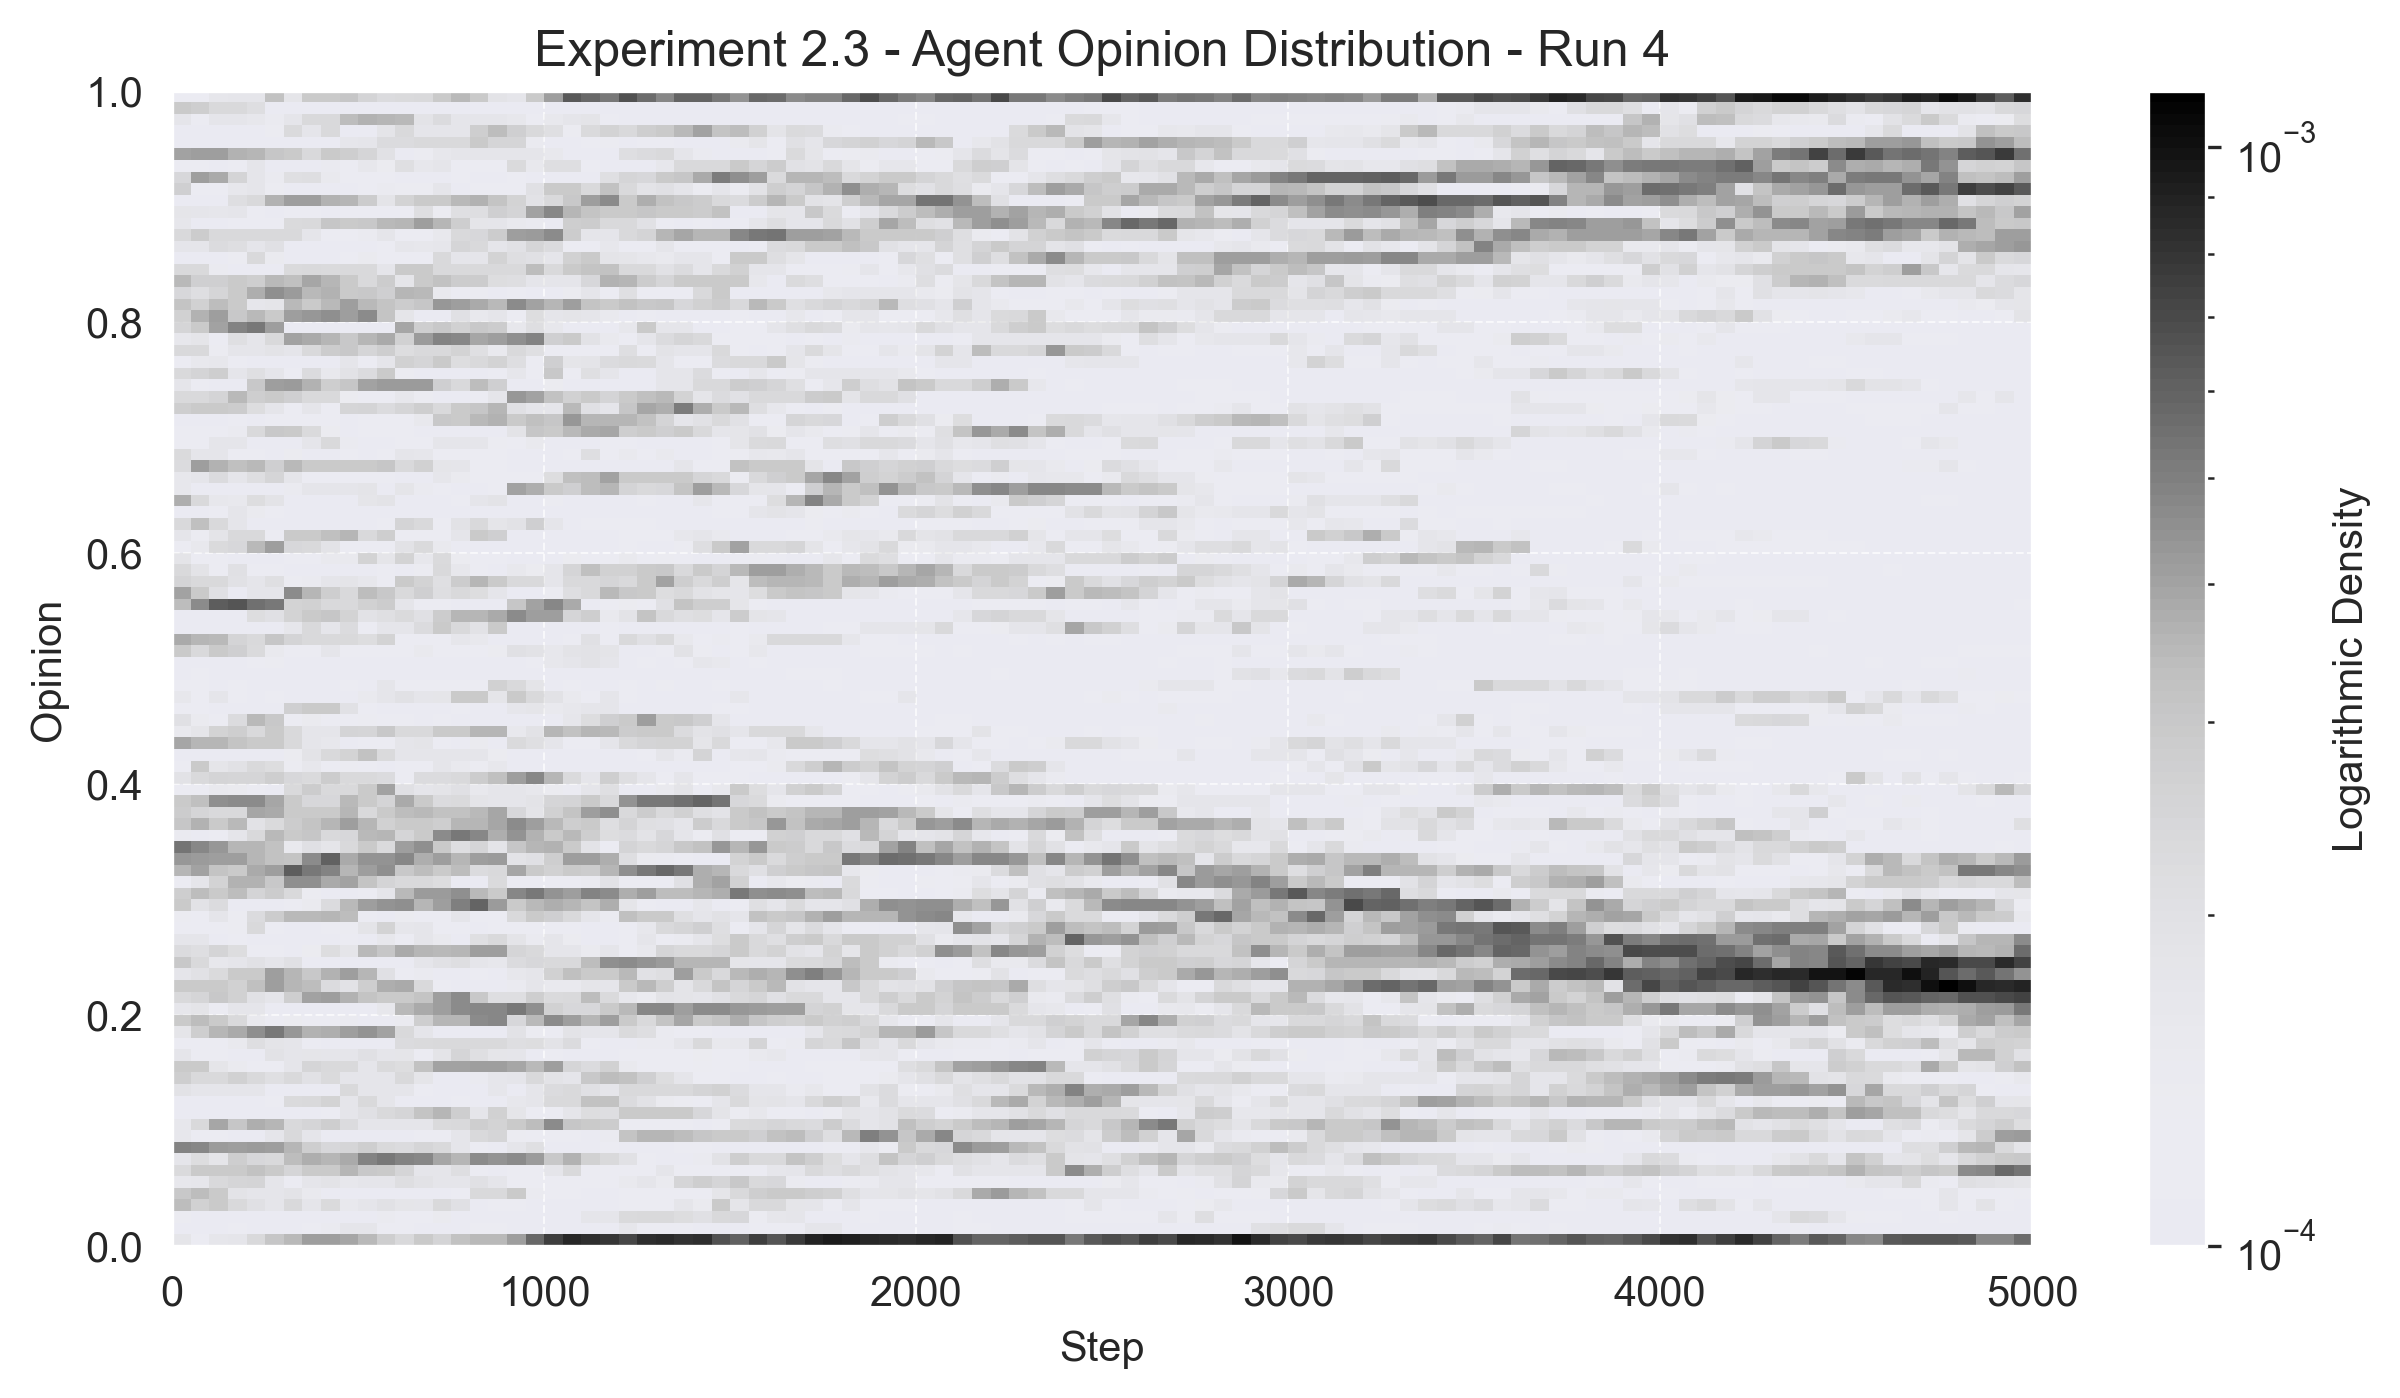

In [74]:
plt.figure(figsize=(10, 5), dpi=300)
 
histogram, xedges, yedges, image = plt.hist2d(steps, opinions, bins=[100, 100], cmap=cmap, norm=LogNorm(vmin=1e-4), density=True)
 
colorbar = plt.colorbar(image, label='Logarithmic Density')
colorbar.set_label('Logarithmic Density')
 
plt.xlabel('Step')
plt.ylabel('Opinion')
plt.title(f'Experiment {str} - Agent Opinion Distribution - Run {num}')
 
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig(f'plots/clusters/experiment-{str}-run-{num}.png', dpi=300)
plt.show()